In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [118]:
data = pd.read_csv('insurance.csv')

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [120]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [121]:
data.shape
print(f'No. of rows {data.shape[0]}')
print(f'No. of columns {data.shape[1]}')

No. of rows 1338
No. of columns 7


In [122]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [123]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [124]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [125]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [126]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [127]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [128]:
data['sex'] =data['sex'].map({'female': 0, 'male': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [129]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [131]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.0,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.0,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.0,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.0,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.0,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.0,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,0.0,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,0.0,53.130000,5.000000,1.000000,4.000000,63770.428010


In [132]:
X = data.drop(['charges'], axis = 1)
y = data['charges']

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor    

In [135]:
lr = LinearRegression()
lr.fit(X_train, y_train)
svr = SVR()
svr.fit(X_train, y_train)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [136]:
y_pred_lr = lr.predict(X_test)
y_pred_svr = svr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

predictions = pd.DataFrame({'Actual' : y_test, 'lr' : y_pred_lr, 'rfr' : y_pred_rfr, 'svr' : y_pred_svr, 'gbr' : y_pred_gbr})

In [137]:
predictions

,Actual,lr,rfr,svr,gbr
764,9095.06825,8914.964939,10437.728755,9548.396056,10715.604700
887,5272.17580,7107.067869,4995.284304,9492.929605,5734.815142
890,29330.98315,36898.396588,28525.953042,9648.505259,27473.077309
1293,9301.89355,9517.238635,10233.223328,9555.142739,9659.845756
259,33750.29180,27021.137717,34744.866288,9420.996893,33980.407620
...,...,...,...,...,...
109,47055.53210,39125.042904,46714.473226,9648.637320,45674.931779
575,12222.89830,11805.529338,12358.441757,9625.217907,12090.633945
535,6067.12675,7647.461307,6503.357714,9504.522946,7145.433767
543,63770.42801,40947.943206,46816.396625,9604.925260,48007.848521


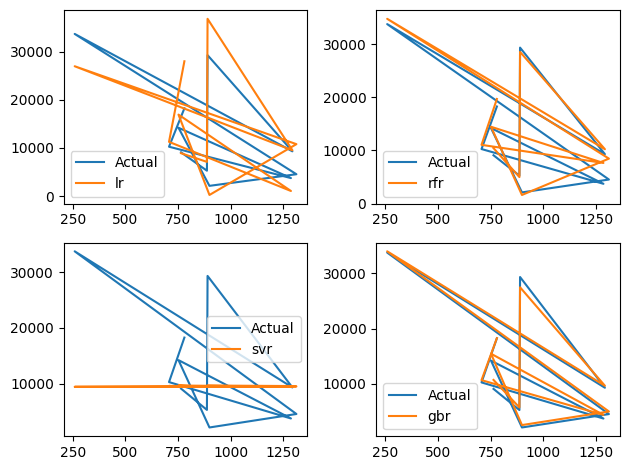

In [138]:
plt.subplot(221)
plt.plot(predictions['Actual'].iloc[0:11], label = 'Actual')
plt.plot(predictions['lr'].iloc[0:11], label = 'lr')
plt.legend()

plt.subplot(222)
plt.plot(predictions['Actual'].iloc[0:11], label = 'Actual')
plt.plot(predictions['rfr'].iloc[0:11], label = 'rfr')
plt.legend()

plt.subplot(223)
plt.plot(predictions['Actual'].iloc[0:11], label = 'Actual')
plt.plot(predictions['svr'].iloc[0:11], label = 'svr')
plt.legend()

plt.subplot(224)
plt.plot(predictions['Actual'].iloc[0:11], label = 'Actual')
plt.plot(predictions['gbr'].iloc[0:11], label = 'gbr')
plt.legend()

plt.tight_layout()
plt.legend()

In [139]:
from sklearn import metrics
score_lr = metrics.r2_score(y_test, y_pred_lr)
score_svr = metrics.r2_score(y_test, y_pred_svr)
score_rfr = metrics.r2_score(y_test, y_pred_rfr)
score_gbr = metrics.r2_score(y_test, y_pred_gbr)

In [140]:
print(f'lr score: {score_lr}')
print(f'svr score: {score_svr}')
print(f'rfr score: {score_rfr}')
print(f'gbr score: {score_gbr}')

lr score: 0.7833112270019787
svr score: -0.07230355100583319
rfr score: 0.8668957211453115
gbr score: 0.8793457497424316


In [141]:
MAE_lr = metrics.mean_absolute_error(y_test,y_pred_lr)
MAE_svr = metrics.mean_absolute_error(y_test,y_pred_svr)
MAE_rfr = metrics.mean_absolute_error(y_test,y_pred_rfr)
MAE_gbr = metrics.mean_absolute_error(y_test,y_pred_gbr)

In [142]:
print(f'lr score: {MAE_lr}')
print(f'svr score: {MAE_svr}')
print(f'rfr score: {MAE_rfr}')
print(f'gbr score: {MAE_gbr}')

lr score: 4187.322474715385
svr score: 8592.63341699496
rfr score: 2453.6859200212516
gbr score: 2393.1565980914115


In [143]:
new_data = data.iloc[0:1, 0:6]
new_data

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1


In [144]:
gbr.predict(new_data)

array([17988.65942809])

In [145]:
data.iloc[0:1,]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,1,16884.924


In [146]:
MAPE = 17988 - 16884
MAPE

1104

# GUI

In [147]:
from tkinter import *

In [148]:
import joblib
joblib.dump(gbr, 'model_joblib_gbr')

['model_joblib_gbr']

In [149]:
new_data

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1


In [150]:
model = joblib.load('model_joblib_gbr')
model.predict(new_data)

array([17988.65942809])

In [151]:
from tkinter import *
import joblib

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('model_joblib_gbr')
    result = model.predict([[p1, p2, p3, p4, p5, p6]])

    Label(master, text='Insurance cost').grid(row=7)
    result_label = Label(master, text=result[0])
    result_label.grid(row=8)

master = Tk()
master.title("Insurance Cost Prediction")
label = Label(master, text="Insurance Cost Prediction", bg='purple', fg='white').grid(row=0, columnspan=3)
Label(master, text="Enter you age").grid(row=1)
Label(master, text="Enter you sex [1/0]").grid(row=2)
Label(master, text="Enter you bmi").grid(row=3)
Label(master, text="Enter no. of children").grid(row=4)
Label(master, text="Enter whether you are a smoker [1/0]").grid(row=5)
Label(master, text="Enter the region you belong to [1-4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master, text="Predict", command=show_entry).grid(row=7, column=1)

mainloop()


In [1]:
data.head()

NameError: name 'data' is not defined